### 

# Trends and Competittion in Formula One
Brian Zbojna <br>
Michael Carnowell <br>
Patrick Vongphakdy <br>

## Introduction

We want to analyze the Formula 1 dataset in order to discover what features might be related (such as mean lap time vs finishing position), what trends exist (i.e. What year in a driver's career is most likely to be their best?), and create a working definition of how competitive the sport is in order to measure if the major regulation changes that have been introduced over the years have had any large effects. 

## Changes

We have not made very many changes since the proposal. We still are interested in the same questions and trends, and our data has not changed. We still want to discover a good measure for judging the competitiveness of the sport.

## Data Cleaning

The data set was very clean as provided. However, some gaps in the data do exist. In the best case, the gaps are often marked (for instance, if a driver did not finish a race he does not have a finishing position, but does have a column marking why he did not finish), and in the worst case the data does not seem to be available (lap time and pit stop time data for the earlier years of the sport). The latter form of missing data may impede the range of time we can cover in our analysis, but should not prevent us from answering any of our questions other than shortening our timeframe. 

## Exploratory Data Analysis and Visualisations (Patrick)

### Pit Stop Data Analysis

For analyzing the pit stop data, we will determine how the duration of a pit stop effects how the overall lap went. To get a small glipse of the data, we will only use one race.

First we will get the data form pit_times and lap_times, and combine both dataframes pandas. We first need to rename some columns from our pit database so the merge doesn't appear confusing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/pit_stops.csv")
df2 = pd.read_csv("data/lap_times.csv")

df2 = df2.loc[df2['raceId'] == 841]
df = df.loc[df['raceId'] == 841]

df.rename(columns = {'lap':'pit_lap', 'time':'pit_time', 'milliseconds':'pit_ms'}, inplace = True)

print(df.head(5))
print(df2.head(5))

dfmain = pd.merge(df,df2, on = 'driverId', how = 'inner')
dfmain.drop('raceId_y', axis = 1, inplace = True)
dfmain


   raceId  driverId  stop  pit_lap  pit_time duration  pit_ms
0     841       153     1        1  17:05:23   26.898   26898
1     841        30     1        1  17:05:52   25.021   25021
2     841        17     1       11  17:20:48   23.426   23426
3     841         4     1       12  17:22:34   23.251   23251
4     841        13     1       13  17:24:10   23.842   23842
   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342


,raceId_x,driverId,stop,pit_lap,pit_time,duration,pit_ms,lap,position,time,milliseconds
0,841,153,1,1,17:05:23,26.898,26898,1,21,2:13.879,133879
1,841,153,1,1,17:05:23,26.898,26898,2,21,1:40.659,100659
2,841,153,1,1,17:05:23,26.898,26898,3,21,1:33.293,93293
3,841,153,1,1,17:05:23,26.898,26898,4,21,1:33.144,93144
4,841,153,1,1,17:05:23,26.898,26898,5,21,1:33.320,93320
...,...,...,...,...,...,...,...,...,...,...,...
2380,841,815,1,23,17:40:27,23.438,23438,54,7,1:31.401,91401
2381,841,815,1,23,17:40:27,23.438,23438,55,7,1:31.536,91536
2382,841,815,1,23,17:40:27,23.438,23438,56,7,1:31.539,91539
2383,841,815,1,23,17:40:27,23.438,23438,57,7,1:31.709,91709


2109    16867
2308    23792
1809    24192
2291    23792
1847    24192
        ...  
105     24463
1296    25342
2334    23438
1520    23227
94      24463
Name: pit_ms, Length: 1908, dtype: int64
2109     7
2308    18
1809     9
2291    19
1847     9
        ..
105     13
1296    11
2334    15
1520     2
94      14
Name: position, Length: 1908, dtype: int64
Coefficients: 
 [[0.00050561]]
Intercept: 
 [-2.64296167]
R-squared: 0.08
mean squared training error: 33.65
mean squared testing error: 24.84


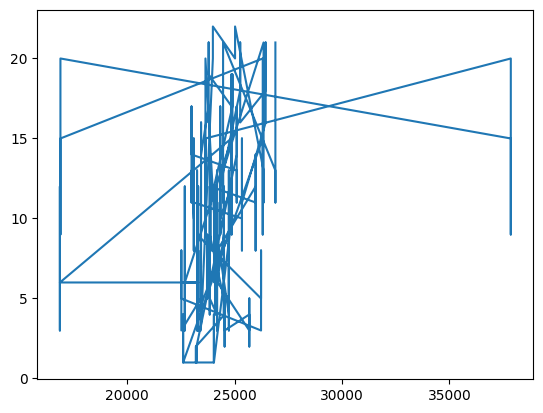

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_data = dfmain['pit_ms']
Y_data = dfmain['position']

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)

print(X_train)
print(Y_train)

m1 = LinearRegression()

X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)

X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

m1.fit(X_train, Y_train)

y_pred = m1.predict(X_test)

# plt.plot(X_data, Y_data)

print("Coefficients: \n", m1.coef_)

print('Intercept: \n', m1.intercept_)

print('R-squared: %.2f' % r2_score(Y_test, y_pred))

print('mean squared training error: %.2f'% mean_squared_error(Y_train[0:477], y_pred, squared= True))

print('mean squared testing error: %.2f'% mean_squared_error(Y_test[0:477], y_pred, squared= True))

plt.plot(X_data, Y_data)

From the scatter plot, we could see that the average pit stop time for most teams were around 22500 and 27500 miliseceonds, with outliers of some extremely fast pitstop times and occasional long pit stop time.

When it comes to placement of teams depenedent on pitstop times, we can see that top teams placed around the average.

## Exploratory Data Analysis and Visualisations (Brian)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

resultsDF = pd.read_csv('data/results.csv')

resultsDF.shape

(25660, 18)

We see that we have a very comprehensive dataset. We have 18 columns, and 25660 rows/entries.

In [5]:
resultsDF.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

Quantitative Discrete:
resultId, raceId, driverId, constructorId, number, grid, points, laps, milliseconds, fastestLap

Quantitative Continuous:
time, fastestLapTime, fastestLapSpeed

Categorical Nominal:
none

Categorical Ordinal:
position, positionText, positionOrder, rank

Some interesting pieces of data are the position and positionText columns. Position indicates the final position of a driver at that specific race. However, we know that some drivers don't necessarily finish every race, due to a number of issues. To circumnavigate this, we could use the positionOrder column, which indicates the final rank of a driver at a specific race. This allows us to collect data on final finishing positions without having to take DNF's into account.

Although we're able to bypass DNF's for the final finishing positions, the same can't be said for other data collected from that driver that race. For example, what happens when a driver can't complete a lap before they retire? We won't have that driver's fastestLapTime, fastestLapSpeed, and rank values. 

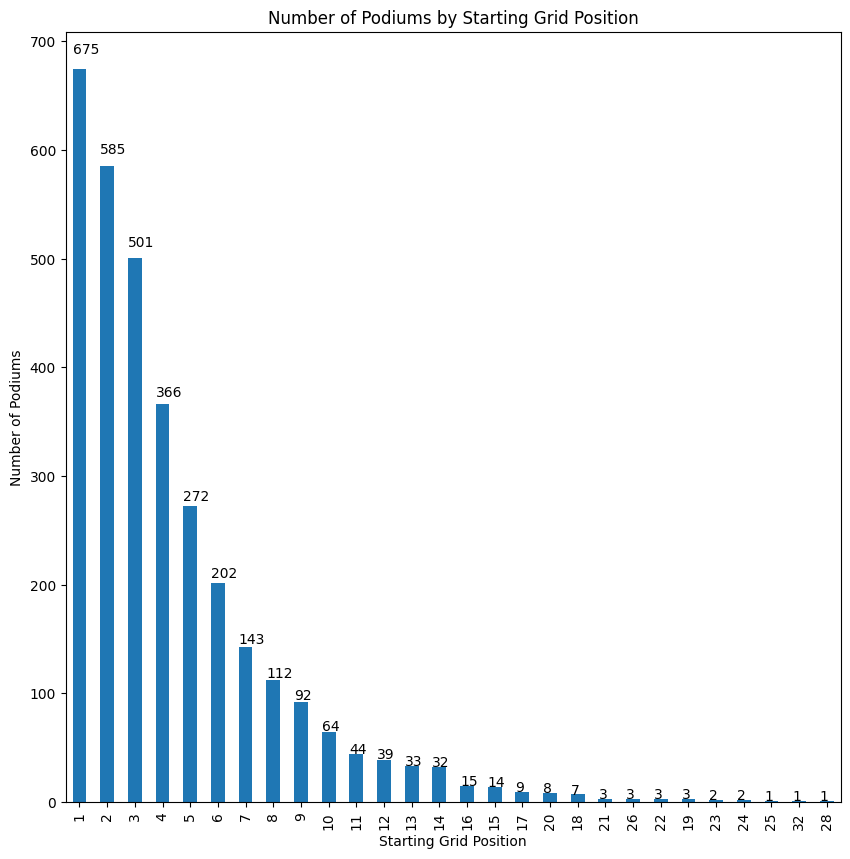

In [6]:
podiumDF = resultsDF[['positionOrder', 'grid']]
podiumDF = podiumDF.loc[podiumDF['positionOrder'] <= 3]

podiumGraph = podiumDF['grid'].value_counts().plot.bar(figsize = (10, 10), title = 'Number of Podiums by Starting Grid Position')
podiumGraph.set_xlabel('Starting Grid Position')
podiumGraph.set_ylabel('Number of Podiums')

for label in podiumGraph.patches:
    podiumGraph.annotate(str(label.get_height()), (label.get_x(), label.get_height() * 1.02))

This visualization tests the hypothesis of how qualifying results impact the results of the final race. We thought it was an interesting hypothesis to investigate because of the potential impact it could have on the race itself. As we can see from the following visualization, out of 3,232 podium results, 1,761, or 54.49% were achieved from drivers who qualified in the top 3 positions. This indicates that qualifying top 3 is a large advantage in the final race.

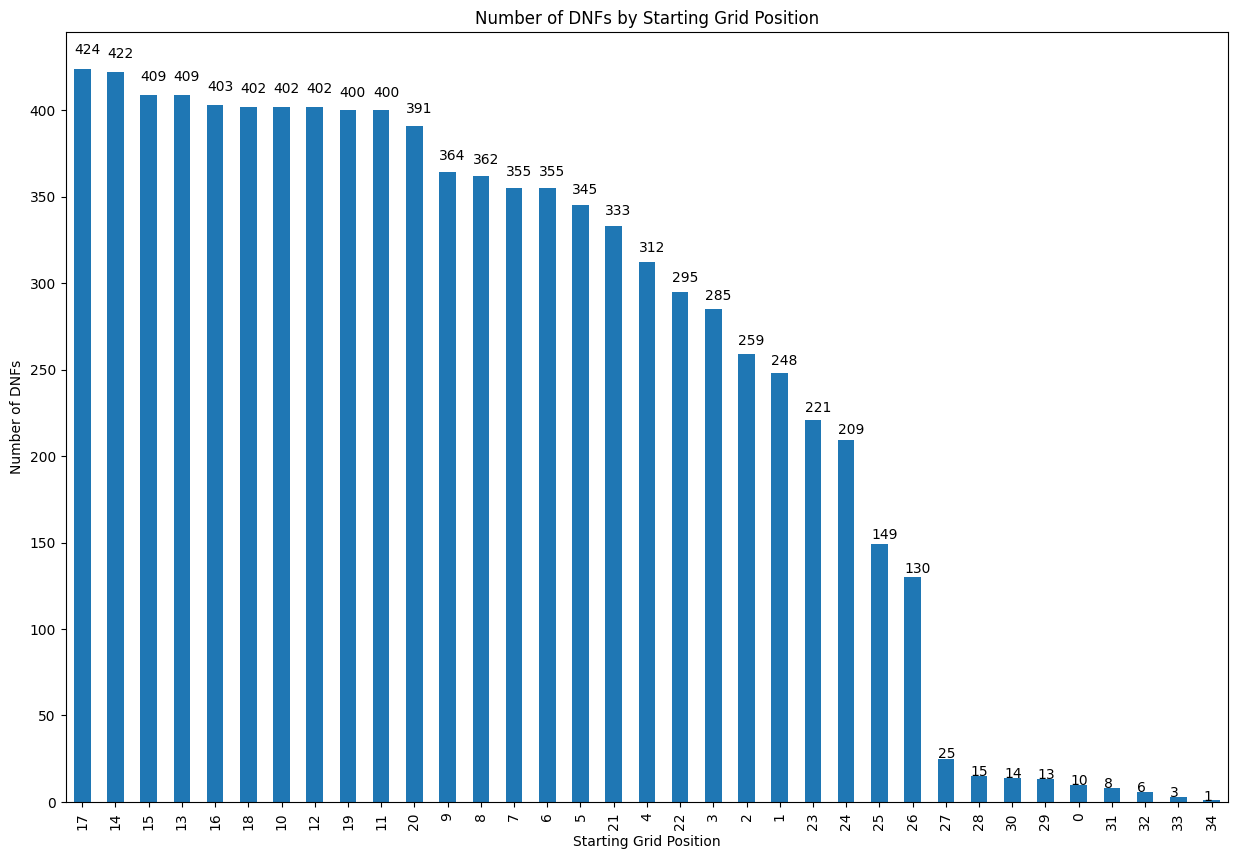

In [7]:
dnfDF = resultsDF[['grid', 'positionText']]
dnfDF = dnfDF.loc[dnfDF['positionText'] == 'R']

dnfGraph = dnfDF['grid'].value_counts().plot.bar(figsize = (15, 10), title = 'Number of DNFs by Starting Grid Position',)
dnfGraph.set_xlabel('Starting Grid Position')
dnfGraph.set_ylabel('Number of DNFs')

for label in dnfGraph.patches:
    dnfGraph.annotate(str(label.get_height()), (label.get_x(), label.get_height() * 1.02))

This visualization tests the hypothesis of the impact of qualifying results on race finishes. We thought it was interesting to investigate because it could highlight specific sections of the grid that are more likely to DNF for whichever reason. This visualization shows an interesting trend. The top 11 grid positions in terms of number of DNFs are all in the bottom half of the possible starting grid positions. Additionally, these 11 grid positions account for 4464 total DNFs out of the 8781 overall DNFs. In other words, around 51% of DNFs came from drivers who started in these grid positions. This raises the question of why so many DNFs come from those starting grid positions. Are drivers further in the back of the pack more likely to get into crashes? Do these drivers push their cars harder to make up for their poor qualifying performances? 

## Exploratory Data Analysis and Visualisations (Michael)

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

lap_times = pd.read_csv('data/lap_times.csv')
races = pd.read_csv('data/races.csv')

df = pd.merge(lap_times, races, on = ['raceId'])

df.describe()

,raceId,driverId,lap,position,milliseconds,year,round,circuitId
count,528785.000000,528785.000000,528785.000000,528785.000000,5.287850e+05,528785.000000,528785.000000,528785.000000
mean,541.681793,277.785648,29.967802,9.650514,9.567868e+04,2009.694078,9.702437,18.237673
std,419.900529,370.144257,18.410254,5.541874,7.533537e+04,7.519150,5.369153,19.460900
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04,1996.000000,1.000000,1.000000
25%,126.000000,15.000000,14.000000,5.000000,8.206100e+04,2003.000000,5.000000,6.000000
50%,352.000000,35.000000,29.000000,9.000000,9.067200e+04,2010.000000,9.000000,12.000000
75%,960.000000,815.000000,44.000000,14.000000,1.022090e+05,2016.000000,14.000000,20.000000
max,1086.000000,855.000000,87.000000,24.000000,7.507547e+06,2022.000000,22.000000,79.000000


We found that the data was largely already in very good shape. In fact, it was so high quality that it was hard to work with. One of the most important parts of Formula one is how each team continuously improves on its car during the season, from race to race. A car with major issues one race could suddenly be very competitive in the next. In addition to that, it's also well-known that the drivers need to get used to the new car each season, as it may have changed drastically either due to technological developments or regulation changes. I thought it would be interesting to see if the drivers became more consistent over the course of a season due to any of these factors. In order to investigate this question, I compiled each driver's mean lap time for each race in four seasons (1996 - 1999), then created a scatterplot of the standard deviation of all driver's mean lap times for each race. I wanted to know if we could see the drivers becoming more consistent compared to each other over the course of a season.

In [10]:
def get_means(year, id_start, id_end):
	races = df[df['year'] == year]

	race_and_driver = races.groupby(['raceId', 'driverId'])['milliseconds'].apply(list)
	race_id = []
	means = []

	for i in range(id_start, id_end + 1):
		for row in race_and_driver[i]:
			race_id.append(i)
			means.append(np.mean(row))

	merge = pd.DataFrame(list(zip(race_id, means)), columns = ['race_id', 'mean_lap_time'])
	grouped = merge.groupby(['race_id'])['mean_lap_time'].apply(list)

	final = []
	for x in grouped:
		final.append(np.std(x) / 1000)

	return final

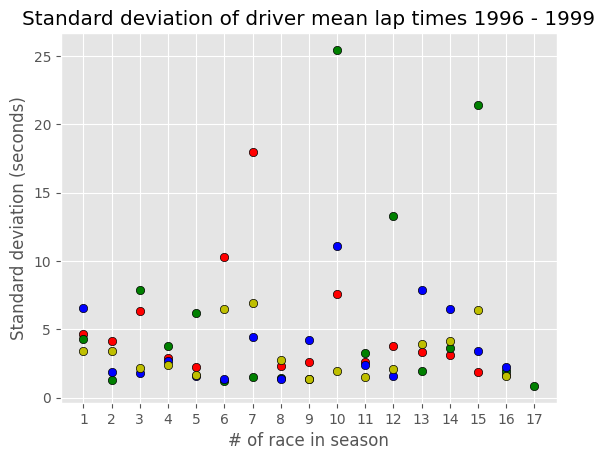

In [15]:

std_1996 = get_means(1996, 224, 239)
std_1997 = get_means(1997, 207, 223)
std_1998 = get_means(1998, 191, 206)
std_1999 = get_means(1999, 175, 190)

plt.style.use('ggplot')
plt.figure(dpi = 100)
plt.scatter(np.arange(1, len(std_1996)+1), std_1996, color = 'r', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1997)+1), std_1997, color = 'g', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1998)+1), std_1998, color = 'b', edgecolor = 'k')
plt.scatter(np.arange(1, len(std_1999)+1), std_1999, color = 'y', edgecolor = 'k')

plt.xticks(np.arange(1, 18, 1))
plt.ylabel('Standard deviation (seconds)');
plt.xlabel('# of race in season');
plt.title('Standard deviation of driver mean lap times 1996 - 1999');

There seems to be a weak corellation between how close the drivers are to each other and the amount of experience they have in their cars, but nothing very conclusive yet. For the next step I plan to incorporate more years of data, and group the data by racetrack so that longer and shorter tracks do not bias the data.

## Reflection

Shockingly, the hardest part of our data was manipulating it into useful categories. For instance, in order to create the variance in lap times analysis, we had to to group individual lap times for a race by driver, then calculate the mean for each driver for each race, then group each race to create our dataset for each race. The data is extremely fine-grained, which means aggregation will be a more time-consuming task than we expected.

Initially, it seems that the data is somewhat consistent with our expectations. Starting grid position does have an effect on finishing position as would seem natural, but it does not seem as strongly corellated with whether or not a driver will DNF. Going forward, we will start to incorporate more of the features we have available to investigate these trends. We feel we are on track to complete the project on time, as we have a good handle on how to manipulate the dataset now. We are comfortable working with and merging the different CSVs, and transforming the dataset to perform different types of analysis.

We also believe that this project is worth proceeding, since we feel we have a few toeholds of interesting analysis that with more features and data incorporated could lead to identifiable trends and conclusions about performance and competitiveness. 